In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
netflix_data = pd.read_csv('/content/netflix1.csv')

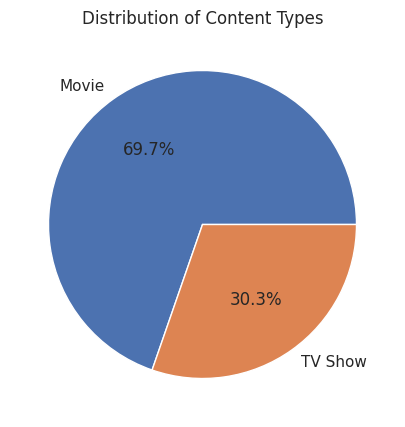

In [2]:


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Content Type (Movie vs. TV Show)
plt.figure(figsize=(7, 5))
netflix_data['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Content Types')
plt.ylabel('')  # Hide the y-label
plt.show()


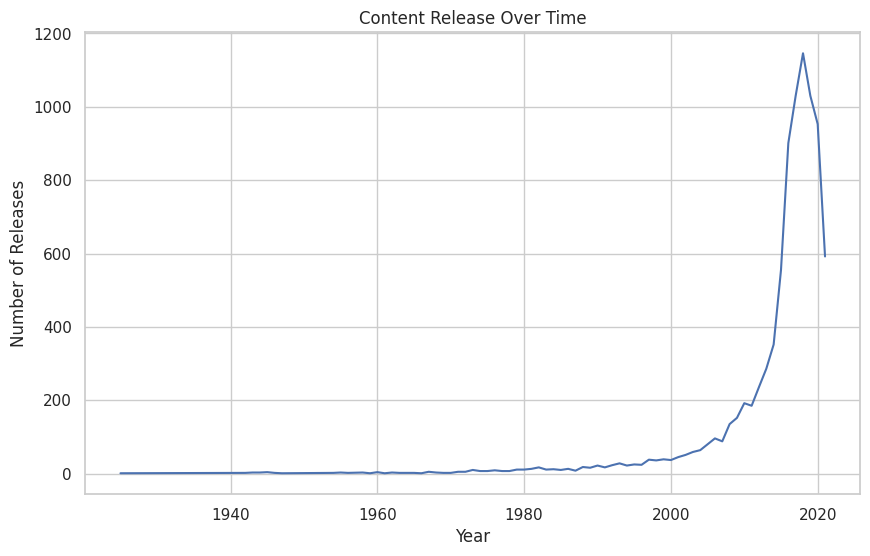

In [3]:
# 2. Content Release Over Time
plt.figure(figsize=(10, 6))
netflix_data['release_year'].value_counts().sort_index().plot()
plt.title('Content Release Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


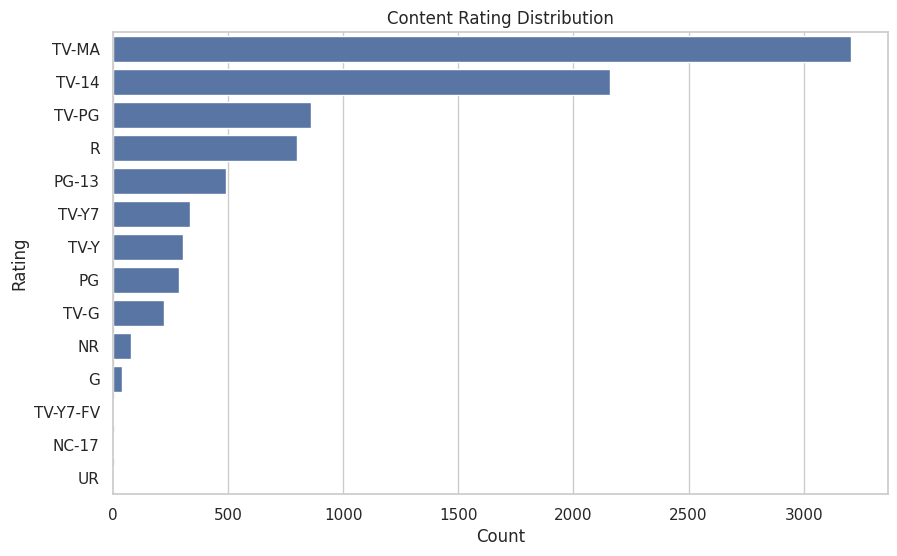

In [4]:
# 3. Content Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data, y='rating', order=netflix_data['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

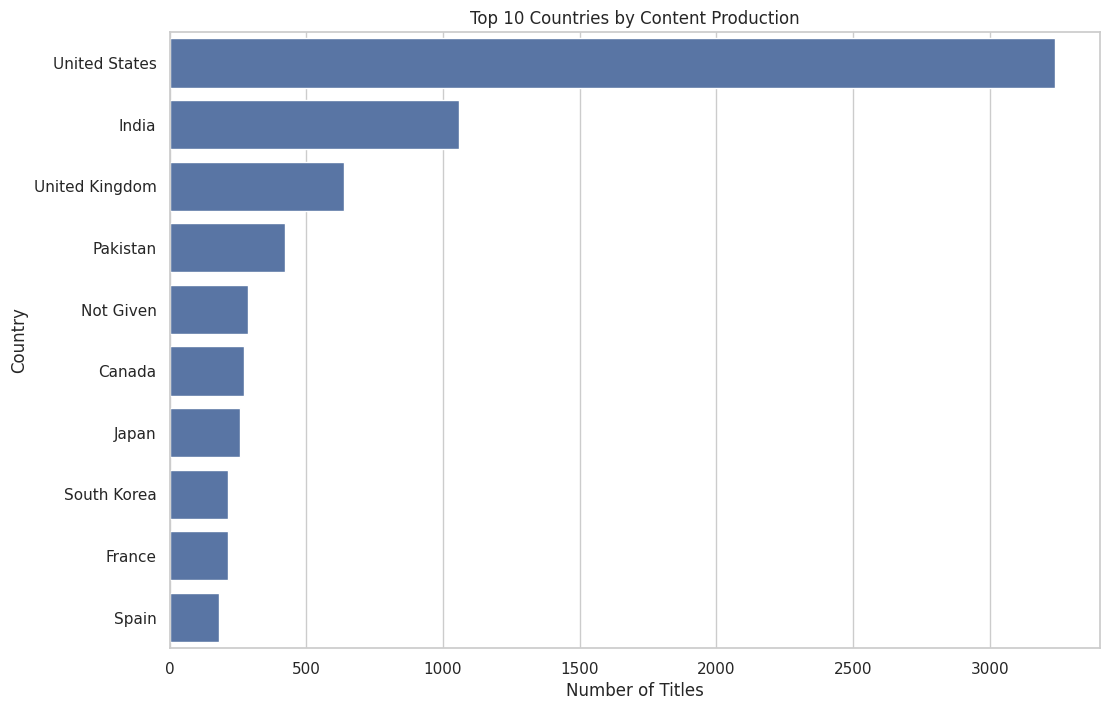

In [5]:
# 4. Country-wise Content Production
plt.figure(figsize=(12, 8))
top_countries = netflix_data['country'].value_counts().head(10)  # You can adjust the number here
sns.barplot(x=top_countries, y=top_countries.index)
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

<ipython-input-6-e957120220f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)


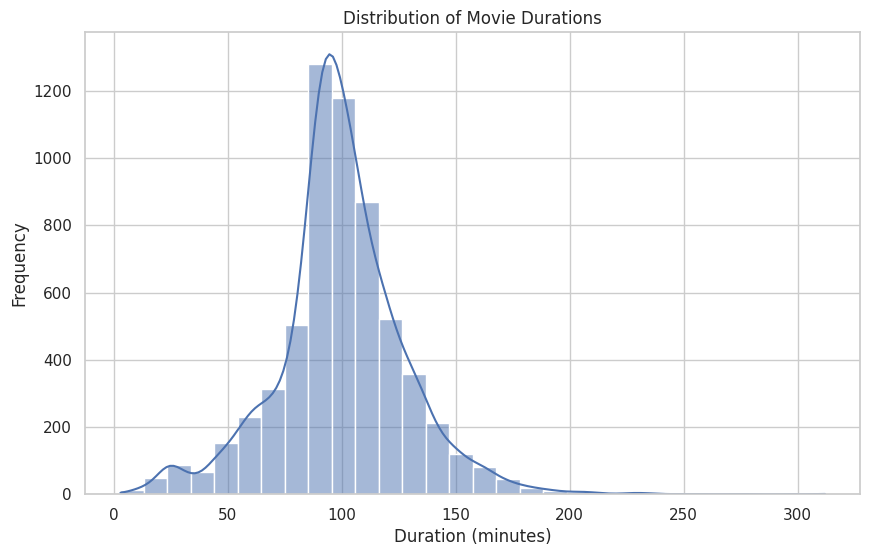

In [6]:
# 5. Duration Distribution for Movies
# Convert duration to numeric after filtering out non-numeric values
movies = netflix_data[netflix_data['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(data=movies, x='duration', bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-62ce5fcdfedc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)


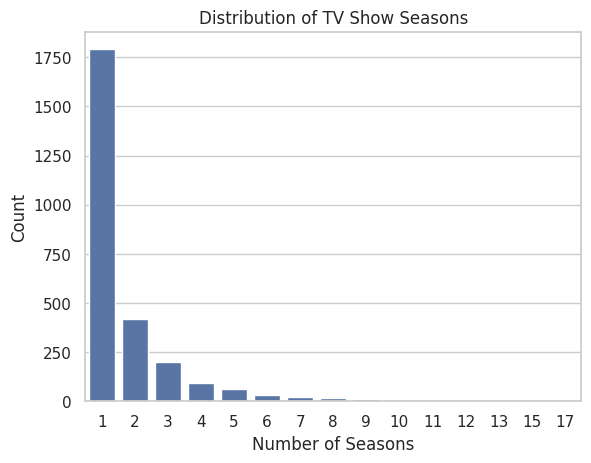

In [7]:
# 6. TV Show Seasons Analysis
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
sns.countplot(data=tv_shows, x='seasons')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

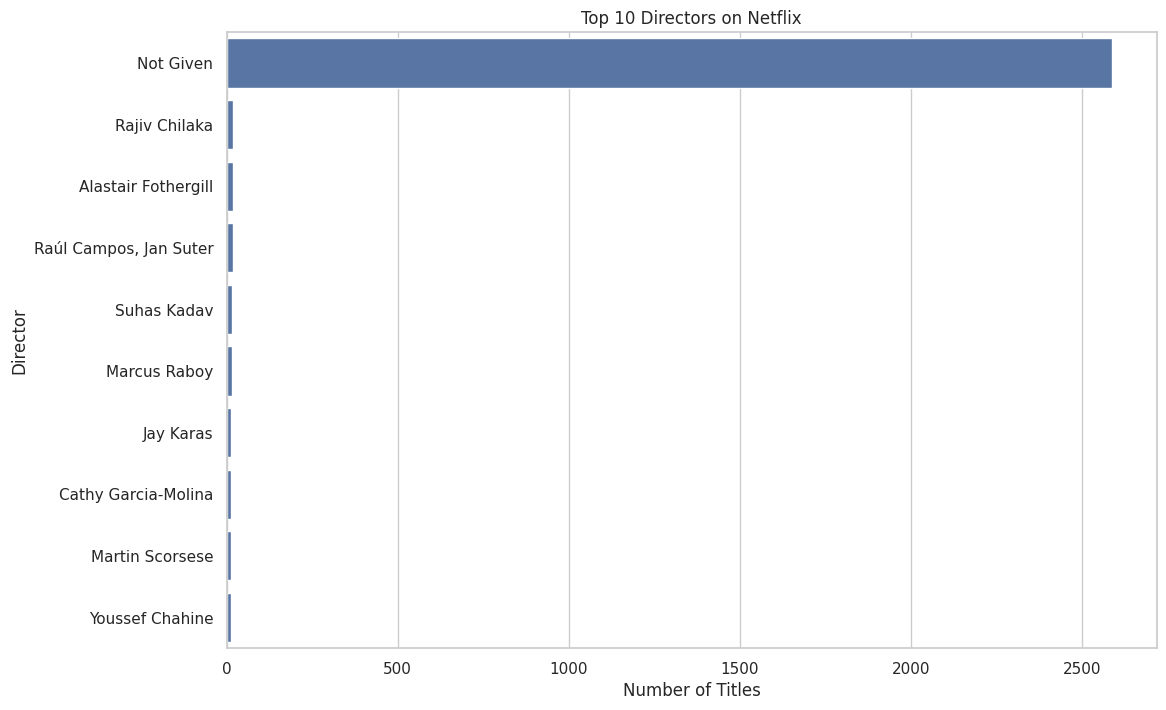

In [8]:
# 7. Top Directors on Netflix
top_directors = netflix_data['director'].value_counts().head(10)  # You can adjust the number here
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

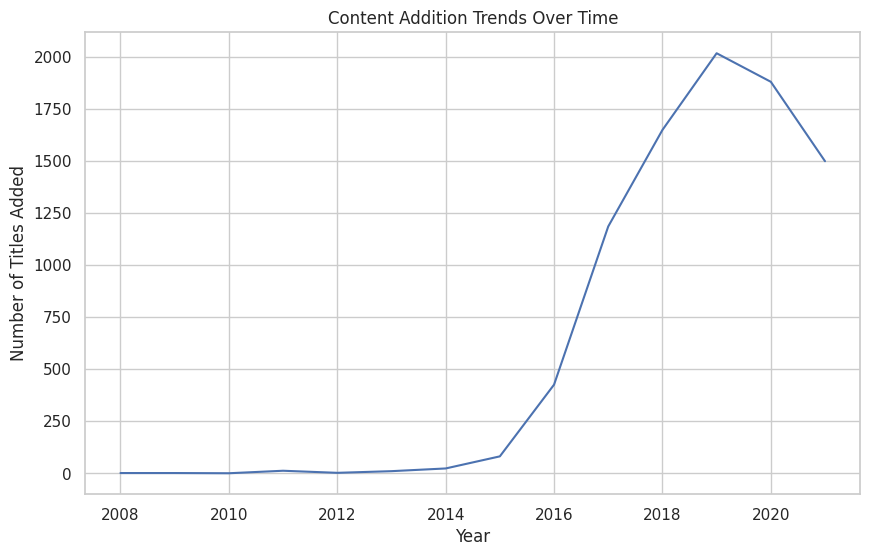

In [9]:
# 8. Content Addition Trends
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['add_year'] = netflix_data['date_added'].dt.year
plt.figure(figsize=(10, 6))
netflix_data['add_year'].value_counts().sort_index().plot()
plt.title('Content Addition Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

<ipython-input-13-97f8f06d3143>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_count.head(10), y='genre', x='count', palette='coolwarm')


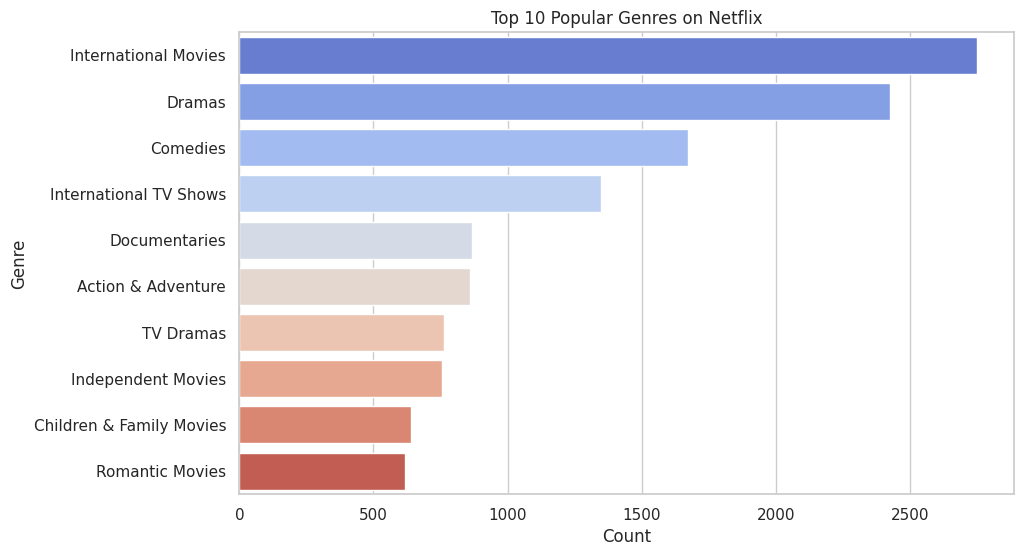

In [13]:


# Create a DataFrame for genres by splitting and exploding the 'listed_in' column
genre_data = netflix_data['listed_in'].str.split(', ').apply(pd.Series).stack().reset_index(level=1, drop=True)
genre_data.name = 'genre'  # Naming the series to use it in a DataFrame

# Create a DataFrame and count occurrences of each genre
genre_count = genre_data.value_counts().reset_index()
genre_count.columns = ['genre', 'count']

# Plotting the top 10 popular genres
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_count.head(10), y='genre', x='count', palette='coolwarm')
plt.title('Top 10 Popular Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


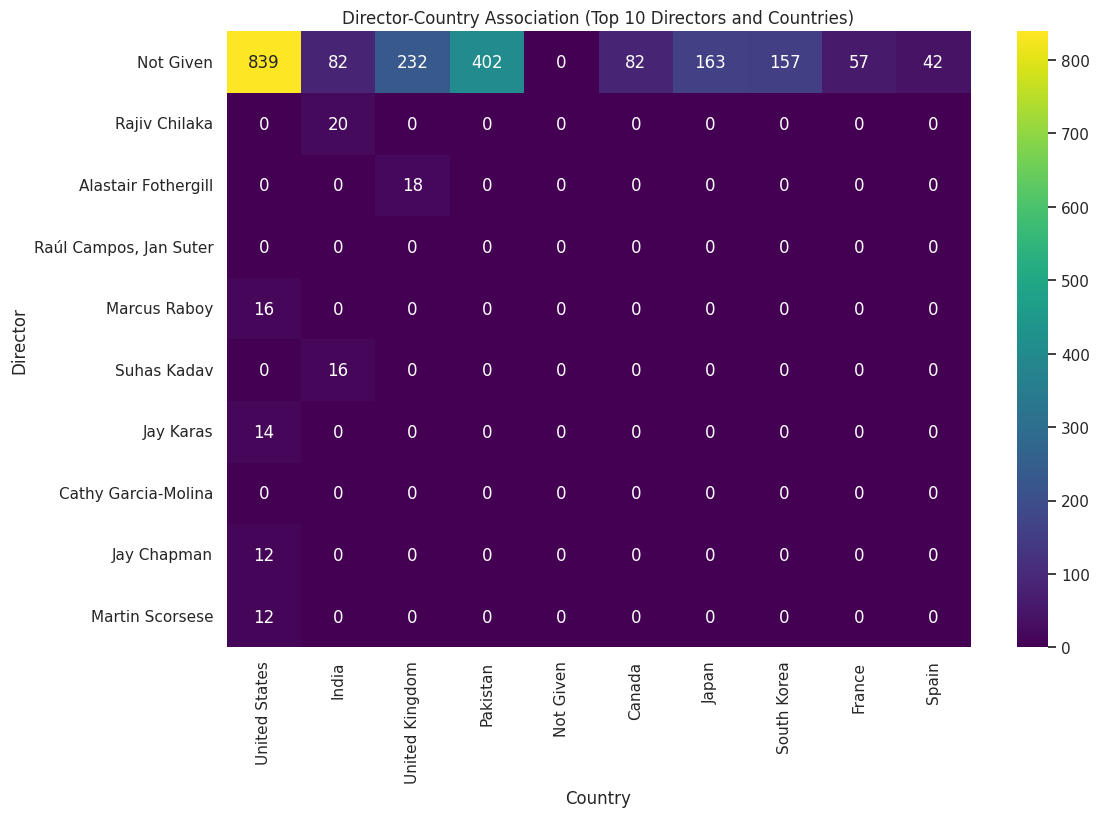

In [12]:


# 10. Director-Country Association
# This requires a more complex aggregation, so here's a simplified version using heatmaps.
country_director = pd.crosstab(netflix_data['director'], netflix_data['country'])
top_directors = country_director.sum(axis=1).nlargest(10).index
top_countries = country_director.sum().nlargest(10).index
filtered_matrix = country_director.loc[top_directors, top_countries]
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Director-Country Association (Top 10 Directors and Countries)')
plt.xlabel('Country')
plt.ylabel('Director')
plt.show()


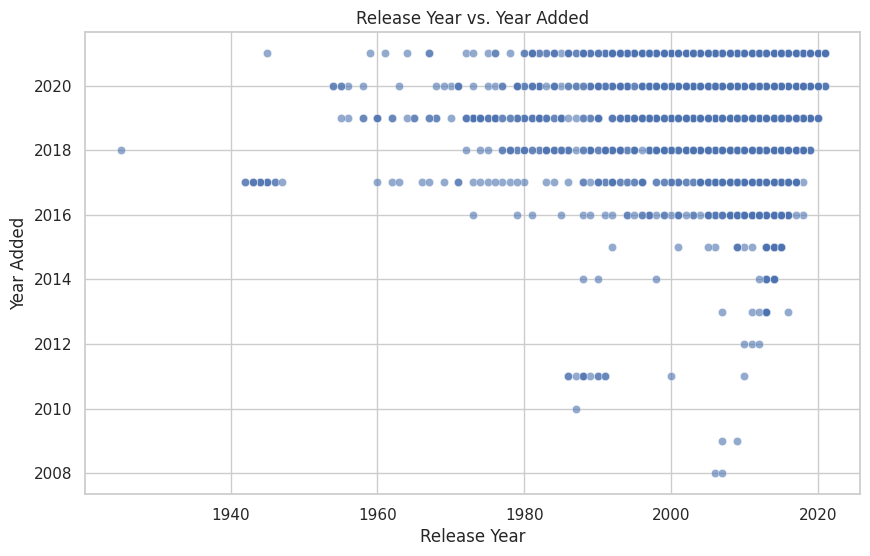

In [14]:
# 11. Release Year vs. Addition Year Analysis
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['add_year'] = netflix_data['date_added'].dt.year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='add_year', data=netflix_data, alpha=0.6)
plt.title('Release Year vs. Year Added')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.show()

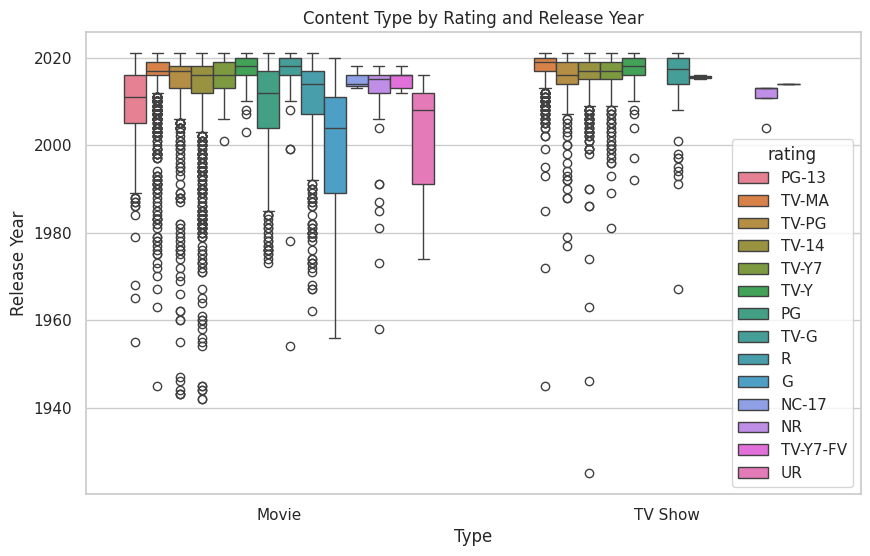

In [15]:
# 12. Content Type by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', hue='rating', data=netflix_data)
plt.title('Content Type by Rating and Release Year')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

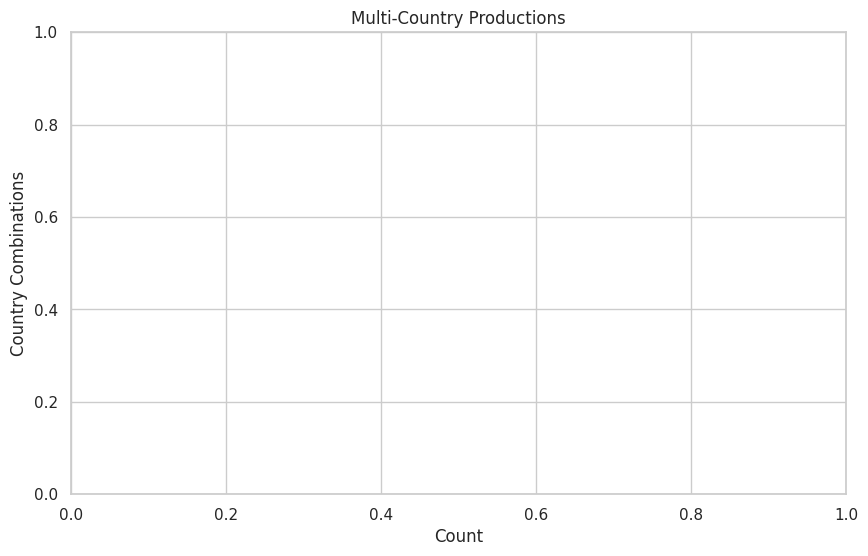

In [27]:
# 13. Multi-Country Productions
netflix_data['country_count'] = netflix_data['country'].apply(lambda x: len(str(x).split(', ')))
multi_country = netflix_data[netflix_data['country_count'] > 1]
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=multi_country, order=multi_country['country'].value_counts().index)
plt.title('Multi-Country Productions')
plt.xlabel('Count')
plt.ylabel('Country Combinations')
plt.show()

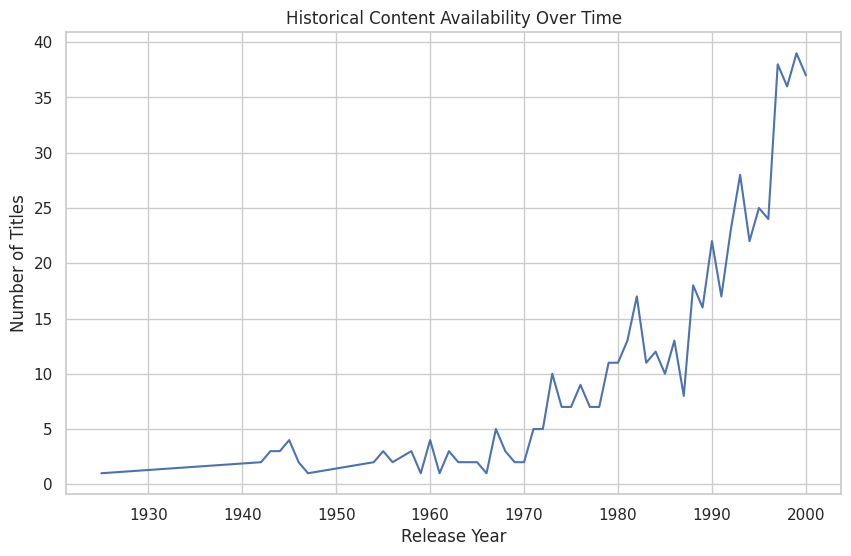

In [17]:
# 14. Historical Content Availability
historical_content = netflix_data[netflix_data['release_year'] < 2001]
plt.figure(figsize=(10, 6))
historical_content['release_year'].value_counts().sort_index().plot()
plt.title('Historical Content Availability Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

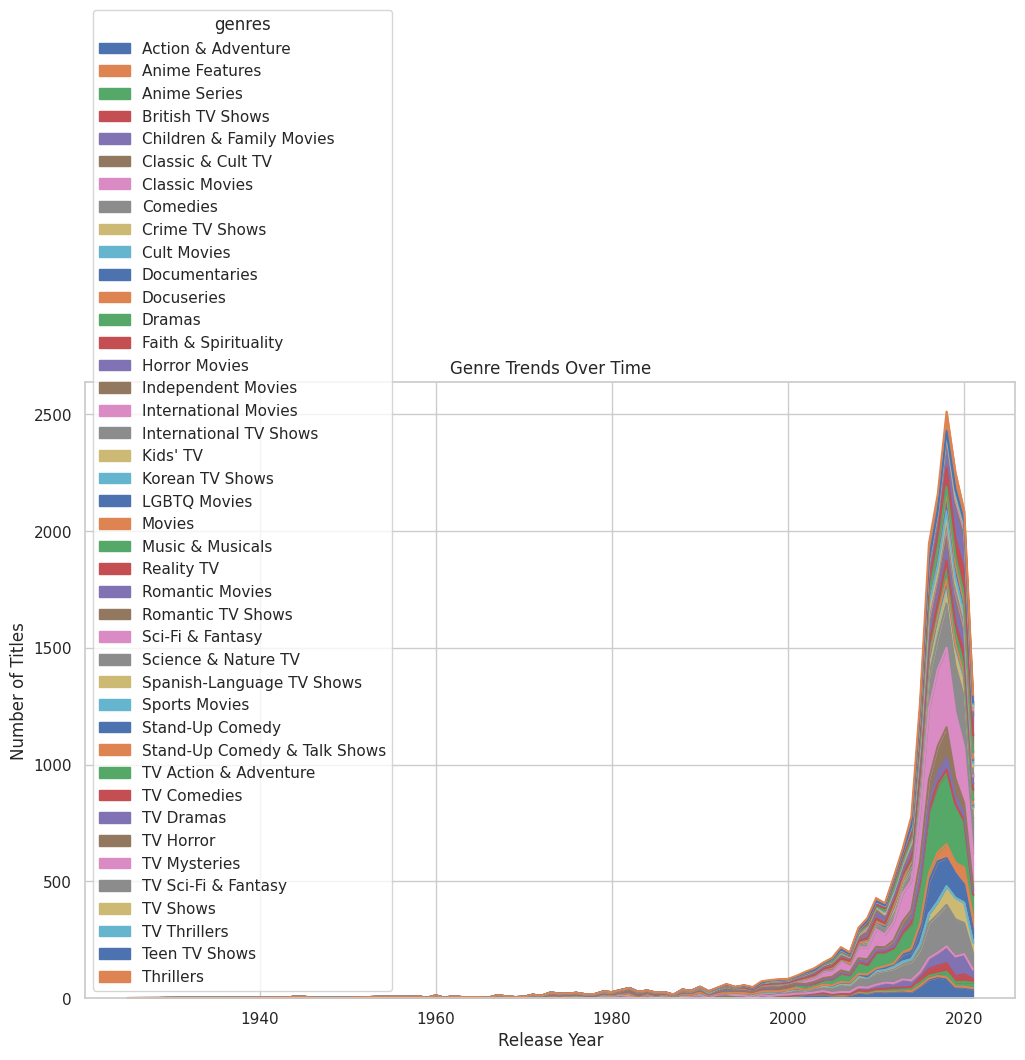

In [18]:
# 15. Genre Trends Over Time
genres_time = netflix_data.copy()
genres_time['genres'] = genres_time['listed_in'].str.split(', ')
genres_time = genres_time.explode('genres')
genres_time['count'] = 1
pivot_table = genres_time.pivot_table(values='count', index='release_year', columns='genres', aggfunc='sum')
pivot_table.fillna(0).plot.area(figsize=(12, 8), legend='right')
plt.title('Genre Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

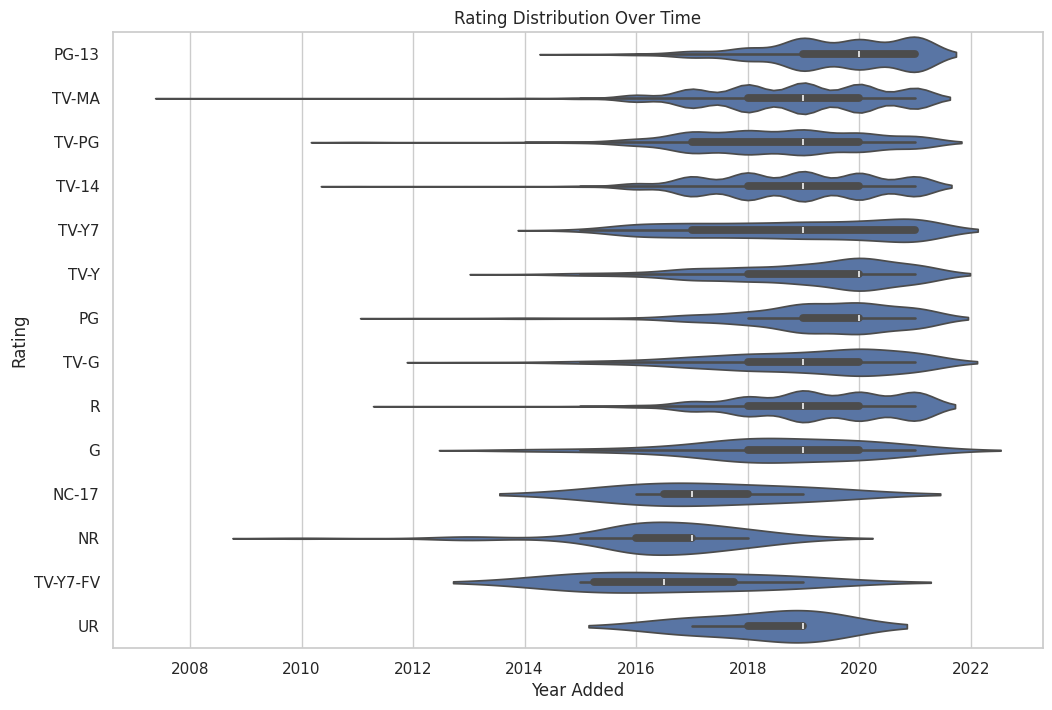

In [19]:
# 16. Rating Distribution Over Time
plt.figure(figsize=(12, 8))
sns.violinplot(x='add_year', y='rating', data=netflix_data)
plt.title('Rating Distribution Over Time')
plt.xlabel('Year Added')
plt.ylabel('Rating')
plt.show()

<ipython-input-24-6f53cb277069>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.extract('(\d+)').astype(int)  # Extracting digits and converting to integer


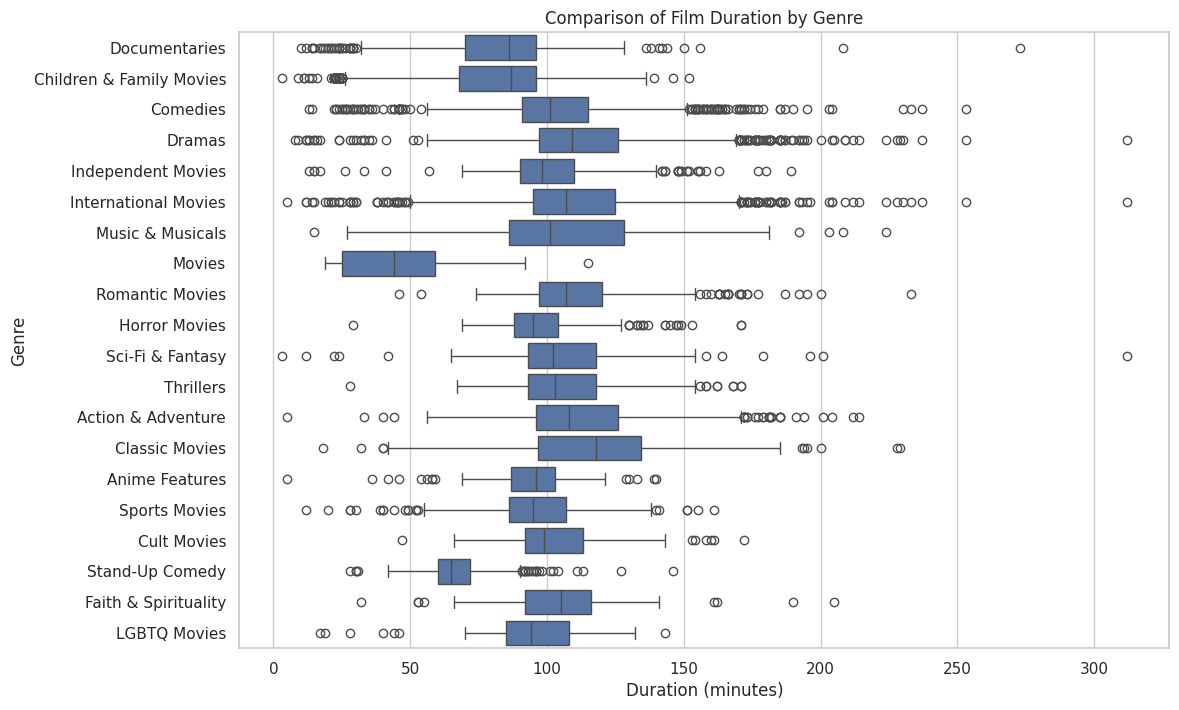

In [24]:
#17: Comparison of Film Duration by Genre
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.extract('(\d+)').astype(int)  # Extracting digits and converting to integer

# Exploding the genres properly with reset_index to ensure unique indices
netflix_movies = netflix_movies.assign(genres=netflix_movies['listed_in'].str.split(', ')).explode('genres').reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.boxplot(x='duration', y='genres', data=netflix_movies)
plt.title('Comparison of Film Duration by Genre')
plt.xlabel('Duration (minutes)')
plt.ylabel('Genre')
plt.show()


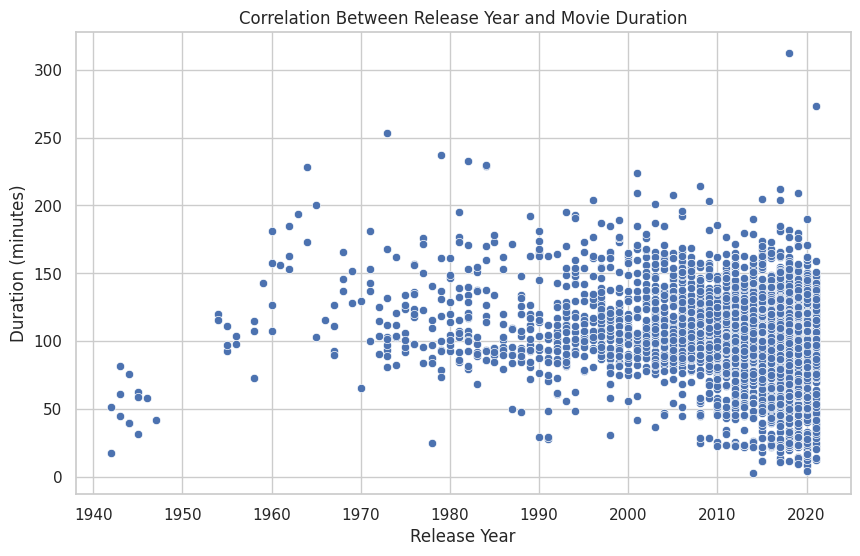

In [21]:
# 18. Correlation between Release Year and Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', data=netflix_movies)
plt.title('Correlation Between Release Year and Movie Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

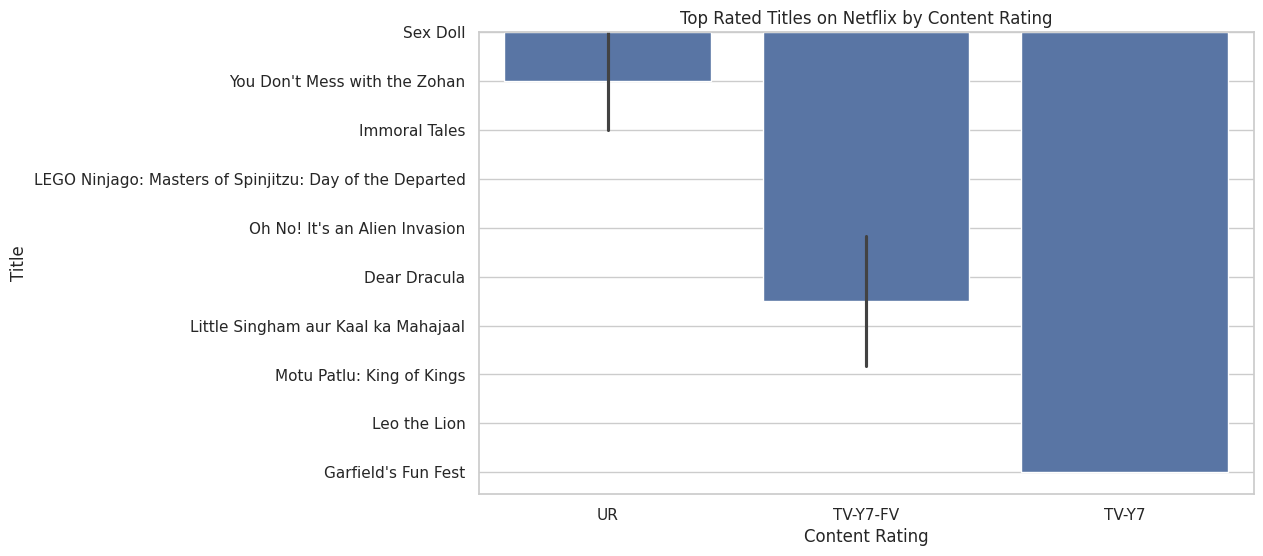

In [25]:
# 19. Popular Content by Viewer Rating
# Assuming you have a viewer rating column 'viewer_rating'
top_rated_content = netflix_data.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=top_rated_content)
plt.title('Top Rated Titles on Netflix by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Title')
plt.show()


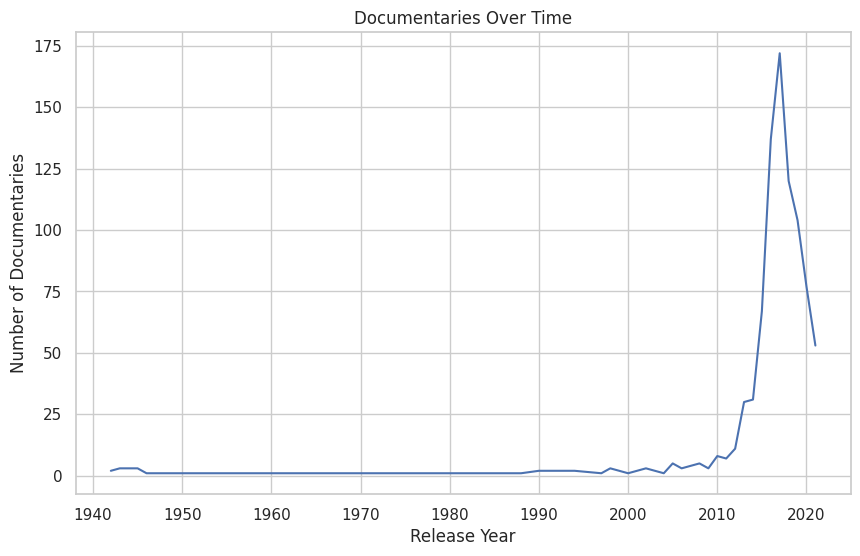

In [23]:
# 20. Analysis of Documentaries
documentaries = netflix_data[netflix_data['listed_in'].str.contains('Documentaries')]
documentaries['release_year'].value_counts().sort_index().plot(figsize=(10, 6))
plt.title('Documentaries Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Documentaries')
plt.show()